In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import os
import shinrl as srl
import seaborn as sns

In [4]:
# use pretrained data in ./results if False
run_experiments = True

# Figure 1. Analyzing DQL Results on MountainCar using ShinRL.

In [3]:
env_config = srl.MountainCar.DefaultConfig()
env = srl.MountainCar()

In [4]:
# delete existing results
path = "./results/dqn"
if run_experiments:
    srl.prepare_history_dir(path, delete_existing=True)

In [5]:
config = srl.DiscreteViSolver.DefaultConfig(
    approx="nn",
    explore="eps_greedy", 
    eps_decay=5000,
    eps_end=0.05,
    target_update_interval=100,
    steps_per_epoch=100000
)
mixins = srl.DiscreteViSolver.make_mixins(env, config)
dqn = srl.DiscreteViSolver.factory(env, config, mixins)

2021-12-16T07:01:02.501725Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 100, 'add_interval': 100, 'steps_per_epoch': 100000, 'explore': <EXPLORE.eps_greedy: 2>, 'exploit': <EXPLOIT.greedy: 2>, 'approx': <APPROX.nn: 2>, 'lr': 0.001, 'num_samples': 4, 'buffer_size': 1000000, 'batch_size': 32, 'er_coef': 0.0, 'kl_coef': 0.0, 'logp_clip': -100000000.0, 'use_double_q': False, 'eps_end': 0.05, 'eps_warmup': 0, 'eps_decay': 5000, 'softmax_tmp': 1.0, 'hidden': 128, 'depth': 2, 'target_update_interval': 100, 'activation': <ACTIVATION.relu: 15>, 'optimizer': <OPTIMIZER.adam: 11>, 'loss_fn': <LOSS.l2_loss: 5>} env_id=None solver_id=MixedSolver-0
2021-12-16T07:01:02.502501Z set_env is called.             env_id=0 solver_id=MixedSolver-0
2021-12-16T07:01:02.504631Z Solver is initialized.         env_id=0 methods=[] mixins=[] solver_id=MixedSolver-0


In [6]:
if run_experiments:
    dqn.run()
    dqn.save(path)

Epoch 0:   0%|                          | 0/100000 [00:00<?, ?it/s]/home/rl-dqn/miniconda3/envs/shinrl-jax/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:6461: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")
Epoch 0: 100%|████████████| 100000/100000 [01:47<00:00, 930.87it/s]
2021-12-16T07:02:50.920147Z Epoch 1 has ended.             data=['QNetParams', 'QNetTargParams', 'QOptState', 'Q', 'ExplorePolicy', 'EvaluatePolicy'] env_id=0 epoch_summary={'Return': {'Average': -22.9215, 'Max': -11.25, 'Min': -200.0}, 'Loss': {'Average': 0.1284652224580568, 'Max': 5.327630519866943, 'Min': 9.724168194225058e-05}} solver_id=MixedSolver-0
2021-12-16T07:02:50.

In [7]:
dqn.load("./results/dqn/")

2021-12-16T07:02:50.941461Z History loaded.                dir_path=./results/dqn/ env_id=0 solver_id=MixedSolver-0


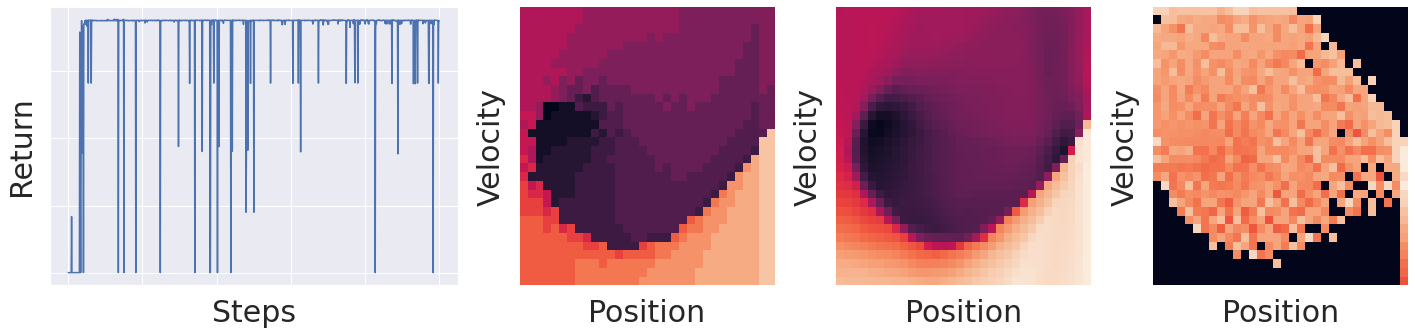

In [8]:
# plot return

performance = dqn.scalars["Return"]

# plot optimal Q values
v = env.calc_optimal_q()[:, -1] 
lv = dqn.data["Q"][:, -1] 
vmin, vmax = min(v.min(), lv.min()), max(v.max(), lv.max())

grid_kws = {"width_ratios": (0.4, 0.25, 0.25, 0.25)}
import seaborn as sns
sns.set(font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), gridspec_kw=grid_kws)


axes[0].plot(performance["x"], performance["y"])
axes[0].set_xlabel("Steps", fontsize=30)
axes[0].set_xticklabels([])
axes[0].set_ylabel("Return", fontsize=30)
axes[0].set_yticklabels([])

env.plot_S(v, ax=axes[1], cbar_ax=None, vmin=vmin, vmax=vmax, fontsize=30)
env.plot_S(lv, ax=axes[2], cbar_ax=None, vmin=vmin, vmax=vmax, fontsize=30)

# plot learnd Q values
from matplotlib.colors import LogNorm
pol = dqn.data["ExplorePolicy"]
visit = env.calc_visit(pol).sum(axis=1) + 1e-30

env.plot_S(visit, ax=axes[3], fontsize=30, norm=LogNorm())


for i in range(1, 4):
    axes[i].set_xlabel("Position")
    axes[i].set_xticklabels([])
    axes[i].set_ylabel("Velocity")
    axes[i].set_yticklabels([])
fig.tight_layout()
plt.savefig("./results/return_Q_visit.svg", format="svg")

# Figure 3. Comparison of DQL with Different Settings on ShinMountainCar.

In [9]:
path = "./results/poor_dqn"
if run_experiments:
    srl.prepare_history_dir(path, delete_existing=True)
config = srl.DiscreteViSolver.DefaultConfig(
    approx="nn",
    explore="eps_greedy",
    eps_decay=1,
    eps_end=0.0,
    eps_warmup=0,
    target_update_interval=100,
    steps_per_epoch=100000)
mixins = srl.DiscreteViSolver.make_mixins(env, config)
poor_dqn = srl.DiscreteViSolver.factory(env, config, mixins)
if run_experiments:
    poor_dqn.run()
    poor_dqn.save(path)

    
path = "./results/better_dqn"
if run_experiments:
    srl.prepare_history_dir(path, delete_existing=True)   
config = srl.DiscreteViSolver.DefaultConfig(
    approx="nn",
    explore="eps_greedy",
    eps_decay=1,
    eps_end=0.1,
    eps_warmup=0,
    target_update_interval=100,
    steps_per_epoch=100000)
mixins = srl.DiscreteViSolver.make_mixins(env, config)
better_dqn = srl.DiscreteViSolver.factory(env, config, mixins)
if run_experiments:
    better_dqn.run()
    better_dqn.save(path)

    
path = "./results/ddqn/"
if run_experiments:
    srl.prepare_history_dir(path, delete_existing=True)   
config = srl.DiscreteViSolver.DefaultConfig(
    approx="nn",
    explore="eps_greedy",
    eps_decay=1,
    eps_end=0.1,
    eps_warmup=0,
    target_update_interval=100,
    steps_per_epoch=100000,
    use_double_q=True,
)
mixins = srl.DiscreteViSolver.make_mixins(env, config)
ddqn = srl.DiscreteViSolver.factory(env, config, mixins)
if run_experiments:
    ddqn.run()
    ddqn.save(path)

2021-12-16T02:23:41.745702Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 100, 'add_interval': 100, 'steps_per_epoch': 100000, 'explore': <EXPLORE.eps_greedy: 2>, 'exploit': <EXPLOIT.greedy: 2>, 'approx': <APPROX.nn: 2>, 'lr': 0.001, 'num_samples': 4, 'buffer_size': 1000000, 'batch_size': 32, 'er_coef': 0.0, 'kl_coef': 0.0, 'logp_clip': -100000000.0, 'use_double_q': False, 'eps_end': 0.0, 'eps_warmup': 0, 'eps_decay': 1, 'softmax_tmp': 1.0, 'hidden': 128, 'depth': 2, 'target_update_interval': 100, 'activation': <ACTIVATION.relu: 15>, 'optimizer': <OPTIMIZER.adam: 11>, 'loss_fn': <LOSS.l2_loss: 5>} env_id=None solver_id=MixedSolver-1
2021-12-16T02:23:41.746422Z set_env is called.             env_id=0 solver_id=MixedSolver-1
2021-12-16T02:23:41.748333Z Solver is initialized.         env_id=0 methods=[] mixins=[] solver_id=MixedSolver-1
Epoch 0: 100%|████████████| 100000/100000 [01:50<00:00, 907.31it/s]
2021-12-16T02:25:32.028032Z 

In [10]:
poor_dqn.load("./results/poor_dqn/")
better_dqn.load("./results/better_dqn/")
ddqn.load("./results/ddqn/")

2021-12-16T02:29:22.272150Z History loaded.                dir_path=./results/poor_dqn/ env_id=0 solver_id=MixedSolver-1
2021-12-16T02:29:22.293956Z History loaded.                dir_path=./results/better_dqn/ env_id=0 solver_id=MixedSolver-2
2021-12-16T02:29:22.316089Z History loaded.                dir_path=./results/ddqn/ env_id=0 solver_id=MixedSolver-3


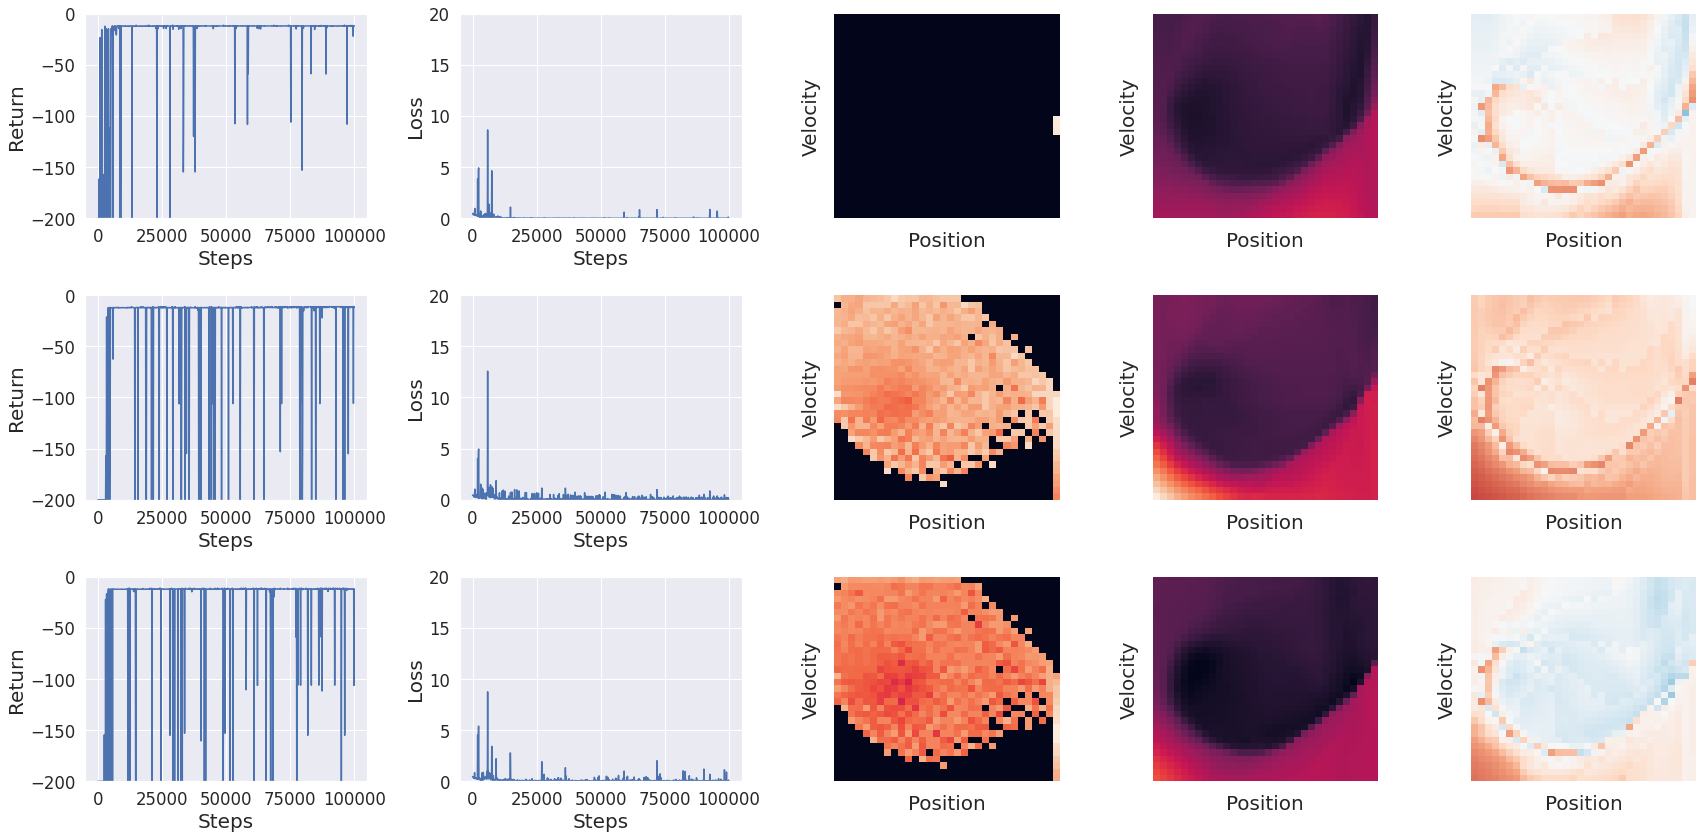

In [11]:
grid_kws = {"width_ratios": (0.25, 0.25, 0.2, 0.2, 0.2)}

import seaborn as sns
from matplotlib.colors import LogNorm, SymLogNorm
sns.set(font_scale=1.5)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(24, 12), gridspec_kw=grid_kws)
v = env.calc_optimal_q()[:, -1]  # dSxdA == (1025, 3)
lv = np.concatenate([dqn.data["Q"][:, -1] for dqn in [poor_dqn, better_dqn, ddqn]])
vmin, vmax = min(v.min(), lv.min()), max(v.max(), lv.max())

# env.plot_S(gap, ax=axes[0], cbar_ax=axes[-1], fontsize=30, norm=SymLogNorm(10, vmin=-100, vmax=25))

for i, dqn in enumerate([poor_dqn, better_dqn, ddqn]):
    performance = dqn.scalars["Return"]
    axes[i, 0].plot(performance["x"], performance["y"])
    axes[i, 0].set_ylim([-200, 0])
    axes[i, 0].set_xlabel("Steps", fontsize=20)
    # axes[i, 0].set_xticklabels([])
    axes[i, 0].set_ylabel("Return", fontsize=20)
    # axes[i, 0].set_yticklabels([])

    
    performance = dqn.scalars["Loss"]
    axes[i, 1].plot(performance["x"], performance["y"])
    axes[i, 1].set_ylim([0, 20])
    axes[i, 1].set_xlabel("Steps", fontsize=20)
    # axes[i, 1].set_xticklabels([])
    axes[i, 1].set_ylabel("Loss", fontsize=20)
    # axes[i, 1].set_yticklabels([])

    
    
    pol = dqn.data["ExplorePolicy"]
    visit = env.calc_visit(pol).sum(axis=1) + 1e-30
    env.plot_S(visit, ax=axes[i, 2], fontsize=20, norm=LogNorm())
    
    lv = dqn.data["Q"][:, 2]
    env.plot_S(lv, ax=axes[i, 3], fontsize=20, vmin=vmin, vmax=vmax)
    
    v = env.calc_optimal_q()[:, 2]
    gap = (lv - v) # * (visit > 1e-30)
    env.plot_S(gap, ax=axes[i, 4], fontsize=20, cmap='RdBu_r', norm=SymLogNorm(5, vmin=-200, vmax=200))
    
    for j in range(2, 5):
        axes[i, j].set_xlabel("Position")
        axes[i, j].set_xticklabels([])
        axes[i, j].set_ylabel("Velocity")
        axes[i, j].set_yticklabels([])
        
plt.tight_layout()
plt.savefig("results/case_study_1.svg", format="svg")

# Case Study2: Comparing VI, KL-regularized VI, CVI, and Munchausen DQN with ShinRL

In [16]:
import jax.numpy as jnp
import jax
import functools


class ErrorMixIn:
    @functools.partial(jax.jit, static_argnums=(0,))
    def make_noise(self, key, target):
        new_key, key = jax.random.split(key)
        noise = jax.random.normal(key, shape=target.shape)
        return new_key, noise
   
    def step(self):
        q = self.data["Q"]  # SxA
        q_targ = self.target_tabular_dp(self.data)  # SxA
        self.key, noise = self.make_noise(self.key, q_targ)
        q_targ = q_targ + noise
        self.data["Q"] = q_targ
        self.update_tb_data()
        return {}

    def evaluate(self):
        res = super().evaluate()
        pol = self.data["EvaluatePolicy"]
        q_opt = self.env.calc_optimal_q()
        q = self.env.calc_q(pol)
        gap = jnp.abs(q_opt - q).max().item()
        res.update({"OptimalityGap": gap})
        return res

2021-12-16T02:32:51.473992Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 1, 'add_interval': 1, 'steps_per_epoch': 150, 'explore': <EXPLORE.oracle: 1>, 'exploit': <EXPLOIT.greedy: 2>, 'approx': <APPROX.tabular: 1>, 'lr': 0.001, 'num_samples': 4, 'buffer_size': 1000000, 'batch_size': 32, 'er_coef': 0.0, 'kl_coef': 0.0, 'logp_clip': -100000000.0, 'use_double_q': False, 'eps_end': 0.1, 'eps_warmup': 0, 'eps_decay': 100000, 'softmax_tmp': 1.0, 'hidden': 128, 'depth': 2, 'target_update_interval': 1000, 'activation': <ACTIVATION.relu: 15>, 'optimizer': <OPTIMIZER.adam: 11>, 'loss_fn': <LOSS.l2_loss: 5>} env_id=None solver_id=MixedSolver-9
2021-12-16T02:32:51.474833Z set_env is called.             env_id=0 solver_id=MixedSolver-9
2021-12-16T02:32:51.476803Z Solver is initialized.         env_id=0 methods=[] mixins=[] solver_id=MixedSolver-9
Epoch 0: 100%|██████████████████| 150/150 [00:00<00:00, 485.11it/s]
2021-12-16T02:32:51.788692Z 

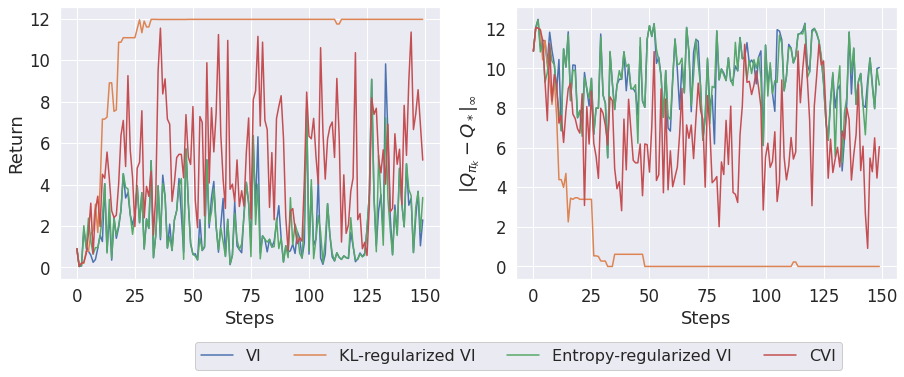

In [17]:
from shinrl import Maze
import seaborn as sns

sns.set(font_scale=1.5)

maze = Maze.str_to_maze_array("SOOO\\" + "O###\\" + "OOOO\\" + "O#RO\\")
config = Maze.DefaultConfig(eps=0.1, horizon=25)
env = Maze(maze, config)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

config = srl.DiscreteViSolver.DefaultConfig(
    add_interval=1,
    eval_interval=1,
    approx="tabular",
    exploit="greedy",
    explore="oracle",
    seed=0,
    steps_per_epoch=150,
    er_coef=0.0,
    kl_coef=0.0

)


# Value Iteration
mixins = srl.DiscreteViSolver.make_mixins(env, config)
solver = srl.DiscreteViSolver.factory(env, config, mixins=[ErrorMixIn, *mixins])
solver.run()
gap = solver.scalars["OptimalityGap"]
ret = solver.scalars["Return"]
axes[1].plot(gap["x"], gap["y"])
axes[0].plot(ret["x"], ret["y"], label=f"VI")

# Munchausen
config.update({"kl_coef": 1.0, "er_coef": 0.0}) 
mixins = srl.DiscreteViSolver.make_mixins(env, config)
solver = srl.DiscreteViSolver.factory(env, config, mixins=[ErrorMixIn, *mixins])
solver.run()
gap = solver.scalars["OptimalityGap"]
ret = solver.scalars["Return"]
axes[1].plot(gap["x"], gap["y"])
axes[0].plot(ret["x"], ret["y"], label=r"KL-regularized VI")

config.update({"kl_coef": 0.0, "er_coef": 0.5}) 
mixins = srl.DiscreteViSolver.make_mixins(env, config)
solver = srl.DiscreteViSolver.factory(env, config, mixins=[ErrorMixIn, *mixins])
solver.run()
gap = solver.scalars["OptimalityGap"]
ret = solver.scalars["Return"]
axes[1].plot(gap["x"], gap["y"])
axes[0].plot(ret["x"], ret["y"], label=r"Entropy-regularized VI")

config.update({"kl_coef": 1.0, "er_coef": 0.5}) 
mixins = srl.DiscreteViSolver.make_mixins(env, config)
solver = srl.DiscreteViSolver.factory(env, config, mixins=[ErrorMixIn, *mixins])
solver.run()
gap = solver.scalars["OptimalityGap"]
ret = solver.scalars["Return"]
axes[1].plot(gap["x"], gap["y"])
axes[0].plot(ret["x"], ret["y"], label=r"CVI")

fig.legend(loc="lower center", framealpha=1.0, fontsize=16, ncol=4, bbox_to_anchor=(0.55, -0.15))
axes[1].set_ylabel("$\|Q_{\pi_k} - Q_*\|_\infty$", fontsize=18)
axes[1].set_xlabel("Steps", fontsize=18)
axes[0].set_ylabel("Return", fontsize=18)
axes[0].set_xlabel("Steps", fontsize=18)
fig.savefig("results/CVI.svg", format="svg", bbox_inches='tight')

In [ ]:
env = srl.make_minatar("breakout")

path = "./results/dqn_breakout/"
if run_experiments:
    srl.prepare_history_dir(path, delete_existing=True)   
config = srl.DiscreteViSolver.DefaultConfig(
    add_interval=10,
    eval_interval=1000,
    steps_per_epoch=1000000,
    approx="nn",
    explore="eps_greedy",
    exploit="greedy",
    num_samples=4,
    eps_end=0.1,
    eps_decay=10**5,
    eps_warmup=5000,
    logp_clip=-1,
    lr=2.5*1e-4,
    batch_size=32,
    buffer_size=1e5,
    optimizer="rmsprop",
    target_update_interval=1000,
    loss_fn="huber_loss",
    kl_coef=0.0,
    er_coef=0.0
)
mixins = srl.DiscreteViSolver.make_mixins(env, config)
dqn_breakout = srl.DiscreteViSolver.factory(env, config, mixins)
if run_experiments:
    dqn_breakout.run()
    dqn_breakout.save(path)

    
path = "./results/mdqn_breakout/"
if run_experiments:
    srl.prepare_history_dir(path, delete_existing=True)   
config = srl.DiscreteViSolver.DefaultConfig(
    add_interval=10,
    eval_interval=1000,
    steps_per_epoch=1000000,
    approx="nn",
    explore="eps_greedy",
    exploit="greedy",
    num_samples=4,
    eps_end=0.1,
    eps_decay=10**5,
    eps_warmup=5000,
    logp_clip=-1,
    lr=2.5*1e-4,
    batch_size=32,
    buffer_size=1e5,
    optimizer="rmsprop",
    target_update_interval=1000,
    loss_fn="huber_loss",
    kl_coef=0.027,
    er_coef=0.003
)
mixins = srl.DiscreteViSolver.make_mixins(env, config)
mdqn_breakout = srl.DiscreteViSolver.factory(env, config, mixins)
if run_experiments:
    mdqn_breakout.run()
    mdqn_breakout.save(path)

In [ ]:
dqn_breakout.load("./results/dqn_breakout/")
mdqn_breakout.load("./results/mdqn_breakout/")

In [ ]:
sns.set(font_scale=1.4)
performance = dqn_breakout.scalars["Return"]
plt.plot(performance["x"], performance["y"], label=f"DQL")
performance = mdqn_breakout.scalars["Return"]
plt.plot(performance["x"], performance["y"], label=f"M-DQL")
plt.ylabel("Average Return", fontsize=20)
plt.xlabel("Steps", fontsize=20)
plt.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
plt.legend(loc="lower center", framealpha=1.0, fontsize=14, ncol=2, bbox_to_anchor=(0.5, -0.45))
plt.savefig("./results/Breakout.svg", bbox_inches='tight')

# Case Study3: Evaluating Poliycy Iteration and Actor Critic

In [5]:
import jax
import jax.numpy as jnp
import functools
import gym
import os

In [6]:
env = gym.make("ShinPendulum-v0")
path = "./results"

class NoiseMixIn:
    @functools.partial(jax.jit, static_argnums=(0,))
    def make_noise(self, key, rew):
        key, new_key = jax.random.split(key)
        noise = 4.9 + 0.1 * jax.random.normal(key, shape=rew.shape)
        noise = jnp.where(rew < -5, noise, 0)
        return new_key, noise
    
    def calc_params(self, prms_dict, samples):
        self.key, noise = self.make_noise(self.key, samples.rew)
        samples = samples._replace(rew=samples.rew + noise)
        return super().calc_params(prms_dict, samples)

config = srl.DiscretePiSolver.DefaultConfig(
    approx="nn", 
    explore="softmax", 
    er_coef=0.1,
    softmax_tmp=0.1,
    target_update_interval=100, 
    steps_per_epoch=20000,
    add_interval=1,
    eval_interval=10,
    q_lr=1e-3,
    pol_lr=1e-3,
)

mixins = srl.DiscretePiSolver.make_mixins(env, config)

In [7]:
for er_coef in [0.0, 0.001, 0.1, 1.0]:
    label = "$\lambda=$" + str(er_coef)
    config.er_coef = er_coef
    config.softmax_tmp = er_coef
    mixins = srl.DiscretePiSolver.make_mixins(env, config)
    pi = srl.DiscretePiSolver.factory(env, config, [NoiseMixIn, *mixins])
    pi.run()
    if run_experiments:
        _path = os.path.join(path, label)
        srl.prepare_history_dir(_path, delete_existing=True)
        pi.save(_path)

2021-12-20T01:32:23.981669Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 10, 'add_interval': 1, 'steps_per_epoch': 20000, 'explore': <EXPLORE.softmax: 3>, 'exploit': <EXPLOIT.greedy: 2>, 'approx': <APPROX.nn: 2>, 'pol_lr': 0.001, 'q_lr': 0.001, 'num_samples': 4, 'buffer_size': 1000000, 'batch_size': 32, 'er_coef': 0.0, 'eps_end': 0.1, 'eps_warmup': 0, 'eps_decay': 100000, 'softmax_tmp': 0.0, 'hidden': 128, 'depth': 2, 'target_update_interval': 100, 'activation': <ACTIVATION.relu: 15>, 'optimizer': <OPTIMIZER.adam: 11>, 'q_loss_fn': <LOSS.l2_loss: 5>, 'pol_loss_fn': <LOSS.cross_entropy_loss: 2>} env_id=None solver_id=MixedSolver-0
2021-12-20T01:32:23.982792Z set_env is called.             env_id=0 solver_id=MixedSolver-0
2021-12-20T01:32:23.984710Z Solver is initialized.         env_id=0 methods=[] mixins=[] solver_id=MixedSolver-0
Epoch 0:   0%|                                                                                    

2021-12-20T01:34:53.488074Z History saved.                 dir_path=./results/$\lambda=$1.0 env_id=0 solver_id=MixedSolver-3


2021-12-20T01:34:53.493584Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 10, 'add_interval': 1, 'steps_per_epoch': 20000, 'explore': <EXPLORE.softmax: 3>, 'exploit': <EXPLOIT.greedy: 2>, 'approx': <APPROX.nn: 2>, 'pol_lr': 0.001, 'q_lr': 0.001, 'num_samples': 4, 'buffer_size': 1000000, 'batch_size': 32, 'er_coef': 1.0, 'eps_end': 0.1, 'eps_warmup': 0, 'eps_decay': 100000, 'softmax_tmp': 1.0, 'hidden': 128, 'depth': 2, 'target_update_interval': 100, 'activation': <ACTIVATION.relu: 15>, 'optimizer': <OPTIMIZER.adam: 11>, 'q_loss_fn': <LOSS.l2_loss: 5>, 'pol_loss_fn': <LOSS.kl_loss: 4>} env_id=None solver_id=MixedSolver-4
2021-12-20T01:34:53.494920Z set_env is called.             env_id=0 solver_id=MixedSolver-4
2021-12-20T01:34:53.496830Z Solver is initialized.         env_id=0 methods=[] mixins=[] solver_id=MixedSolver-4
2021-12-20T01:34:53.743746Z History loaded.                dir_path=./results/$\lambda=$1.0 env_id=0 solver_i

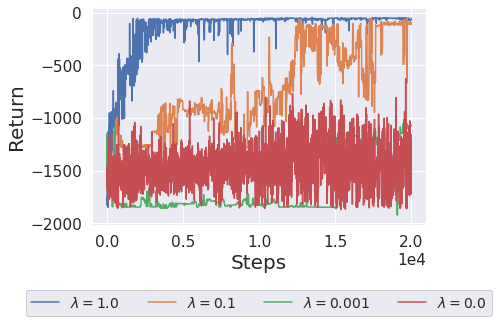

In [8]:
sns.set(font_scale=1.4)
solvers = {}
for er_coef in [1.0, 0.1, 0.001, 0.0]:
    label = "$\lambda=$" + str(er_coef)
    pi = srl.DiscretePiSolver.factory(env, config, [NoiseMixIn, *mixins])
    _path = os.path.join(path, label)
    pi.load(_path)
    solvers[label] = pi
    performance = pi.scalars["Return"]
    x, y = performance["x"], performance["y"]
    plt.plot(x, y, label=label)

plt.ylabel("Return", fontsize=20)
plt.xlabel("Steps", fontsize=20)
plt.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
plt.legend(loc="lower center", framealpha=1.0, fontsize=14, ncol=4, bbox_to_anchor=(0.5, -0.45))
plt.savefig("./results/SAC.svg", bbox_inches='tight')

In [9]:
solvers = {}
for er_coef in [0.0, 0.001, 0.1, 1.0]:
    label = "$\lambda=$" + str(er_coef)
    config.er_coef = er_coef
    config.softmax_tmp = er_coef
    mixins = srl.DiscretePiSolver.make_mixins(env, config)
    pi = srl.DiscretePiSolver.factory(env, config, mixins)
    pi.run()
    solvers[label] = pi

2021-12-20T01:34:55.026846Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 10, 'add_interval': 1, 'steps_per_epoch': 20000, 'explore': <EXPLORE.softmax: 3>, 'exploit': <EXPLOIT.greedy: 2>, 'approx': <APPROX.nn: 2>, 'pol_lr': 0.001, 'q_lr': 0.001, 'num_samples': 4, 'buffer_size': 1000000, 'batch_size': 32, 'er_coef': 0.0, 'eps_end': 0.1, 'eps_warmup': 0, 'eps_decay': 100000, 'softmax_tmp': 0.0, 'hidden': 128, 'depth': 2, 'target_update_interval': 100, 'activation': <ACTIVATION.relu: 15>, 'optimizer': <OPTIMIZER.adam: 11>, 'q_loss_fn': <LOSS.l2_loss: 5>, 'pol_loss_fn': <LOSS.cross_entropy_loss: 2>} env_id=None solver_id=MixedSolver-8
2021-12-20T01:34:55.028411Z set_env is called.             env_id=0 solver_id=MixedSolver-8
2021-12-20T01:34:55.030673Z Solver is initialized.         env_id=0 methods=[] mixins=[] solver_id=MixedSolver-8
Epoch 0: 100%|████████████████████████████████████████████████████████████████████████████████████

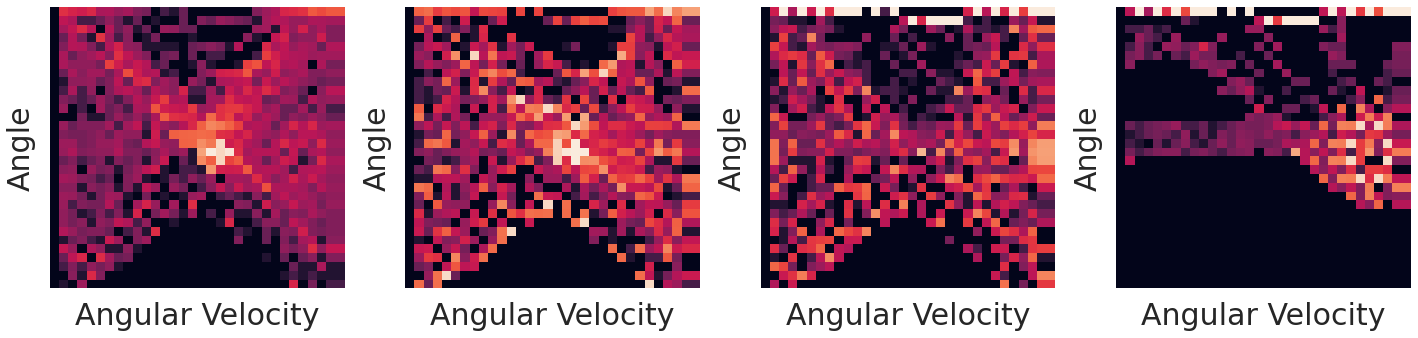

In [10]:
# plot learnd Q values
from matplotlib.colors import LogNorm, SymLogNorm
grid_kws = {"width_ratios": (0.25, 0.25, 0.25, 0.25)}
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), gridspec_kw=grid_kws)

vmax = 0
for i, er_coef in enumerate([1.0, 0.1, 0.001, 0.0]):
    label = "$\lambda=$" + str(er_coef)
    visit = env.count_visit(solvers[label].buffer).sum(1)
    vmax = visit.max()
    
for i, er_coef in enumerate([1.0, 0.1, 0.001, 0.0]):
    label = "$\lambda=$" + str(er_coef)
    visit = env.count_visit(solvers[label].buffer).sum(1) / vmax
    env.plot_S(visit, ax=axes[i], fontsize=30, vmin=0, vmax=1.0, norm=SymLogNorm(0.001, vmin=0, vmax=1.0))


    
for i in range(4):
    axes[i].set_xlabel("Angular Velocity")
    axes[i].set_xticklabels([])
    axes[i].set_ylabel("Angle")
    axes[i].set_yticklabels([])
fig.tight_layout()
fig.savefig("./results/SACvisit.svg", bbox_inches='tight')